# Agriculture Dataset

### Introduction
>Agriculture is the art and science of cultivating the soil, growing crops and raising livestock. It includes the preparation of plant and animal products for people to use and their distribution to markets. Agriculture provides most of the world’s food and fabrics. Cotton, wool, and leather are all agricultural products. Agriculture also provides wood for construction and paper products.These products, as well as the agricultural methods used, may vary from one part of the world to another.

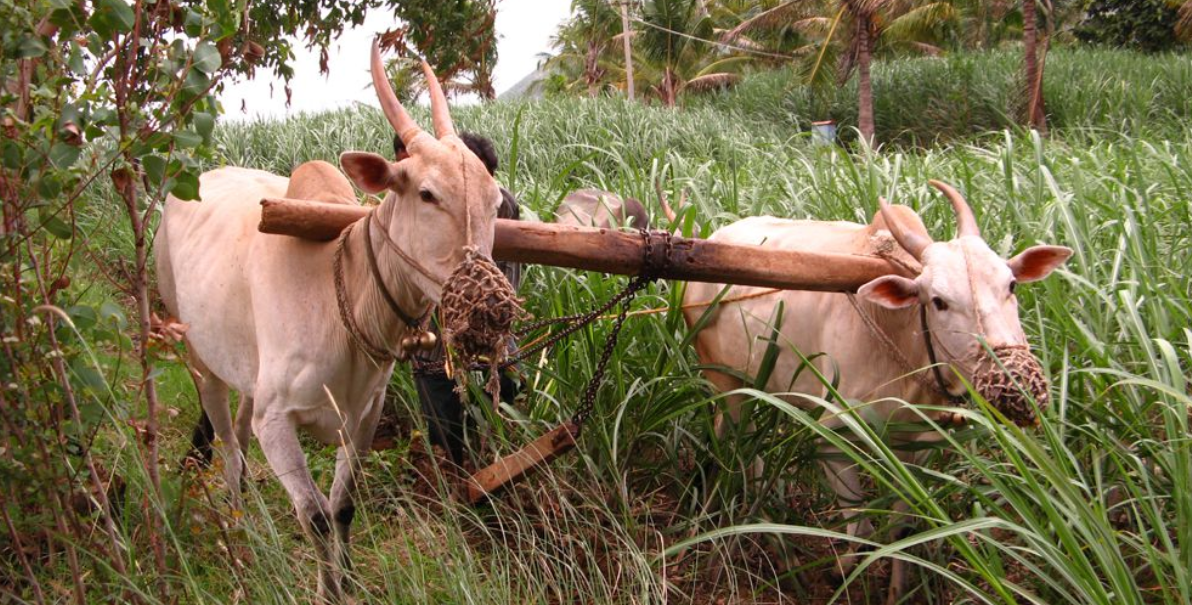
P.C and Data Credit and also do learn more from | https://www.nationalgeographic.org/encyclopedia/agriculture/#oxen-yoked-and-plowing



>Agriculture is one sector responsible for feeding every individual, but the people involved in it are the last to be taken care of. After failing institutions, time has indeed come for technology to take over the change. With newer problems cropping up every day in the most inevitable indigenous sectors, it is high time we resort to emerging technologies for solutions.




### Machine Learning in Agriculture

>Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.
>Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

### The Toxic Pesticides
>Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

>Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

>You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

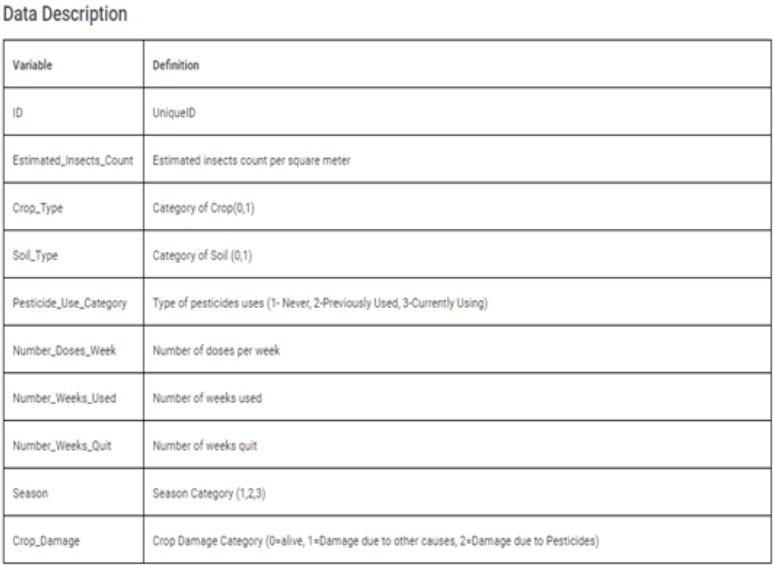




### Importing required libraries for starting our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

lets import our data and see what we have.

In [2]:
df = pd.read_excel("train_agriculture.xlsx")

In [3]:
df

ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0     F00000001                      188          1          0   
1     F00000003                      209          1          0   
2     F00000004                      257          1          0   
3     F00000005                      257          1          1   
4     F00000006                      342          1          0   
...         ...                      ...        ...        ...   
4594  F00008078                     2138          0          1   
4595  F00008079                     2139          0          1   
4596  F00008080                     2267          0          1   
4597  F00008082                     2267          0          1   
4598  F00008083                     2267          0          1   

      Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                          1                  0                0.0   
1                          1                  0                0.0   
2                          1                  0                0.0   
3                          1                  0                0.0   
4                          1                  0                0.0   
...                      ...                ...                ...   
4594                       2                 20                NaN   
4595                       2                 30               47.0   
4596                       2                 10                7.0   
4597                       2                 10               20.0   
4598                       2                 10               33.0   

      Number_Weeks_Quit  Season  Crop_Damage  
0                     0       1            0  
1                     0       2            1  
2                     0       2            1  
3                     0       2            1  
4                     0       2            1  
...                 ...     ...          ...  
4594                  1       1            1  
4595                  2       1            1  
4596                 27       2            0  
4597                 24       2            0  
4598                 17       2            0  

[4599 rows x 10 columns]

In [4]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


# EDA

Lets start our pipeline in identifing nul values and droping the columns that wont help us in prediction.

In [6]:
# ID is a unique value in the Data-Set so it wont help us in the prediction
df.drop('ID', axis=1, inplace = True)

In [7]:
df.isna().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

# Key Observsations:
       Only one columns have missing values lets figure out how to handel but before which lets see the correlation of the dataset.

# Correlation:

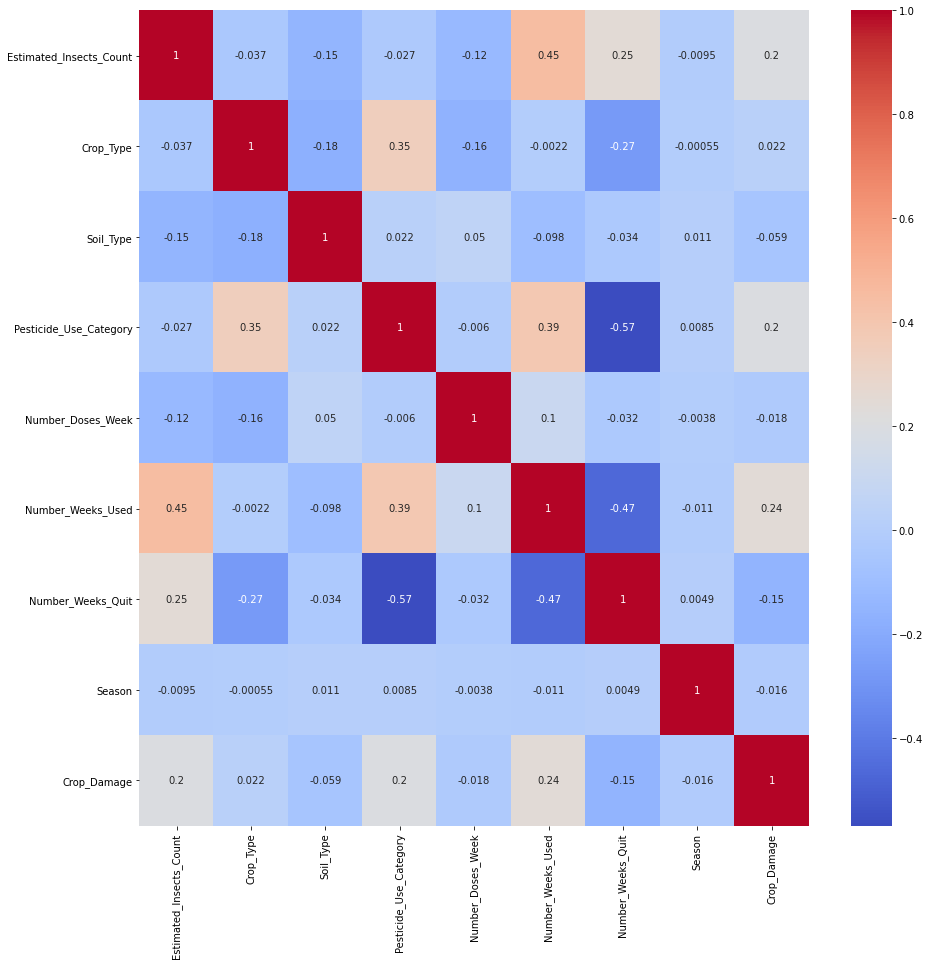

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

### Observation to fill NaN values in 'Number_Weeks_Used' lets use the correlation:
    Estimated_Insects_Count    0.449470
    Pesticide_Use_Category     0.387982
    Crop_Damage                0.244988
    Number_Doses_Week          0.104022
    Crop_Type                 -0.002237
    Season                    -0.011108
    Soil_Type                 -0.098399
    Number_Weeks_Quit         -0.467386

We can see Number_Weeks_Quit -0.467386 has the higest correlation with 'Number_Weeks_Used' we will split the data according to the unique values of Number_Weeks_Quit and fill nan values in 'Number_Weeks_Used'

In [9]:
list= []

for i in df.Number_Weeks_Quit.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'NWQ_{i} = df.loc[df.Number_Weeks_Quit=={list[i]}]')
    exec(f"NWQ_{i}.Number_Weeks_Used.fillna(NWQ_{i}['Number_Weeks_Used'].mode()[0], inplace = True)")

DF = pd.concat([NWQ_0,NWQ_1,NWQ_2,NWQ_3,NWQ_4,NWQ_5,NWQ_6,NWQ_7,NWQ_8,NWQ_9,NWQ_10,NWQ_11,NWQ_12,NWQ_13,NWQ_14,
                NWQ_15,NWQ_16,NWQ_17,NWQ_18,NWQ_19,NWQ_20,NWQ_21,NWQ_22,NWQ_23,NWQ_24,NWQ_25,NWQ_26,NWQ_27,
                NWQ_28,NWQ_29,NWQ_30,NWQ_31,NWQ_32,NWQ_33,NWQ_34,NWQ_35,NWQ_36,NWQ_37,NWQ_38,NWQ_39,NWQ_40,
                NWQ_41,NWQ_42,NWQ_43,NWQ_44,NWQ_45,NWQ_46])
df= DF.sort_index()

In [10]:
DF.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

WE have removed al the null values in replacing Null with mode of the missing data

### Lets see the mathematical summary of the DataSet.

In [11]:
df.describe()

Estimated_Insects_Count    Crop_Type    Soil_Type  \
count              4599.000000  4599.000000  4599.000000   
mean               1363.000435     0.224831     0.476625   
std                 814.439120     0.417517     0.499508   
min                 150.000000     0.000000     0.000000   
25%                 731.000000     0.000000     0.000000   
50%                1212.000000     0.000000     0.000000   
75%                1786.000000     0.000000     1.000000   
max                4097.000000     1.000000     1.000000   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
count             4599.000000        4599.000000        4599.000000   
mean                 2.283540          26.477495          29.073712   
std                  0.471978          15.524647          12.374977   
min                  1.000000           0.000000           0.000000   
25%                  2.000000          15.000000          20.000000   
50%                  2.000000          20.000000          29.000000   
75%                  3.000000          40.000000          39.000000   
max                  3.000000          95.000000          66.000000   

       Number_Weeks_Quit       Season  Crop_Damage  
count        4599.000000  4599.000000  4599.000000  
mean            9.205479     1.894325     0.194390  
std             9.713253     0.694952     0.454597  
min             0.000000     1.000000     0.000000  
25%             0.000000     1.000000     0.000000  
50%             7.000000     2.000000     0.000000  
75%            16.000000     2.000000     0.000000  
max            47.000000     3.000000     2.000000

### Key Observation:
    1. Categorical Variable column:
        1. 'Crop_Type'
        2. 'Soil_Type',
        3. 'Pesticide_Use_Category'
        4. 'Season'
    
    
    2. Continous variable column:  
       1. Estimated_Insects_Count
       2. Number_Weeks_Quit
       3. Number_Doses_Week 	
       4. Number_Weeks_Used
  >Mean is greater than 50th% and also difference between 74th% and Max is larger which means there are outliers and skewness present in the data.   
     
     
    3. Target Variable Column:
       1. Crop_Damage

### Lets see the Correlation of all the Feature_variable with Target_Variable:

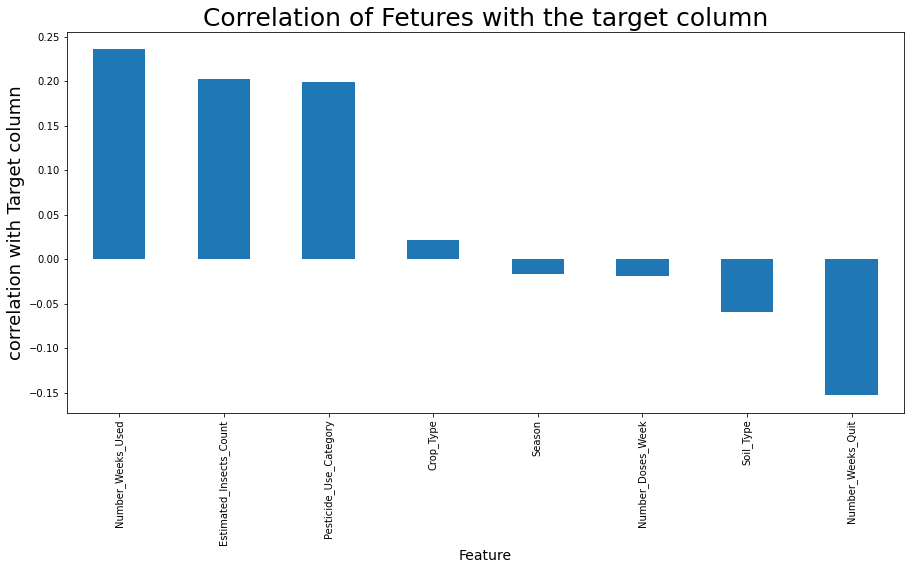

In [12]:
plt.figure(figsize=(15,7))
df.corr()["Crop_Damage"].sort_values(ascending=False).drop(["Crop_Damage"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["Crop_Damage"].sort_values(ascending=False)).drop(["Crop_Damage"])

In [13]:
print("Key observation:\n", cor)

Key observation:
                          Crop_Damage
Number_Weeks_Used           0.235674
Estimated_Insects_Count     0.202312
Pesticide_Use_Category      0.199195
Crop_Type                   0.021772
Season                     -0.016196
Number_Doses_Week          -0.018363
Soil_Type                  -0.059481
Number_Weeks_Quit          -0.152918


1. Number_Weeks_Used is 0.23 correlated with Crop_Damage, which is the good number of weak pesticide used will give healthy crops at 23%
2. Number_Weeks_Quit is -0.15 corelated with Crop_damage, which is Number_Weeks_Quit without using pesticide will give Damaged crop at 15%.          

### Lets Identify the Skewness in the data By Univariate analysis.

## Univariate analysis

In [14]:
agro1="#07fa60"
agro2="#78fcac"
agro3="#8cc894"
agro4="#345434"
agro5="#067528"

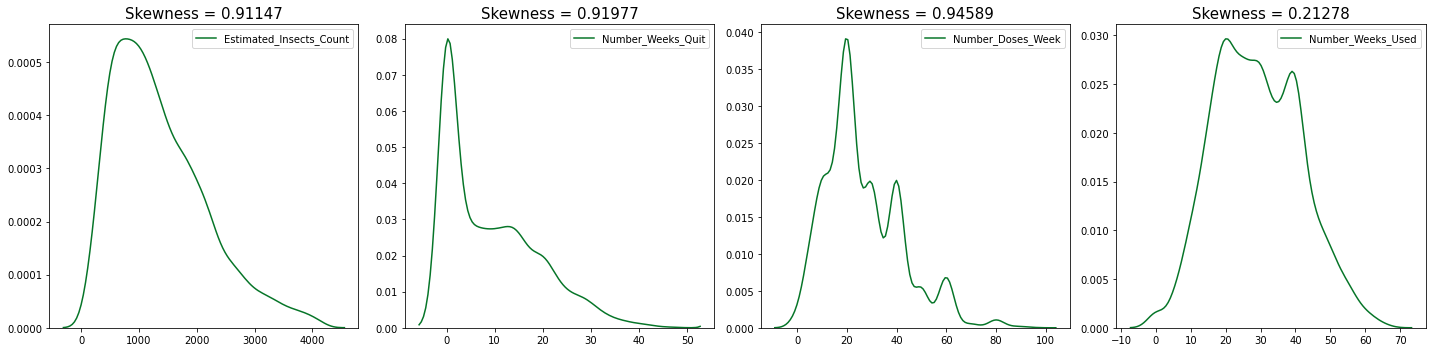

In [15]:
plt.figure(figsize=(20,5))
collist = ["Estimated_Insects_Count","Number_Weeks_Quit","Number_Doses_Week","Number_Weeks_Used"]
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)         
    sns.kdeplot(df[collist[i]], color = agro5)
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [16]:
skewness=[]
colist = df.columns.values
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": colist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n",
      skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row) 



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['Crop_Damage', 'Crop_Type', 'Number_Doses_Week', 'Number_Weeks_Quit', 'Estimated_Insects_Count', 'Pesticide_Use_Category'] 

negative Skewed data:
 []


### Skewness removal:

    Data has too much skewness but removing all will deform the data.We will use "yeojohnson method" to correct the skewness.

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


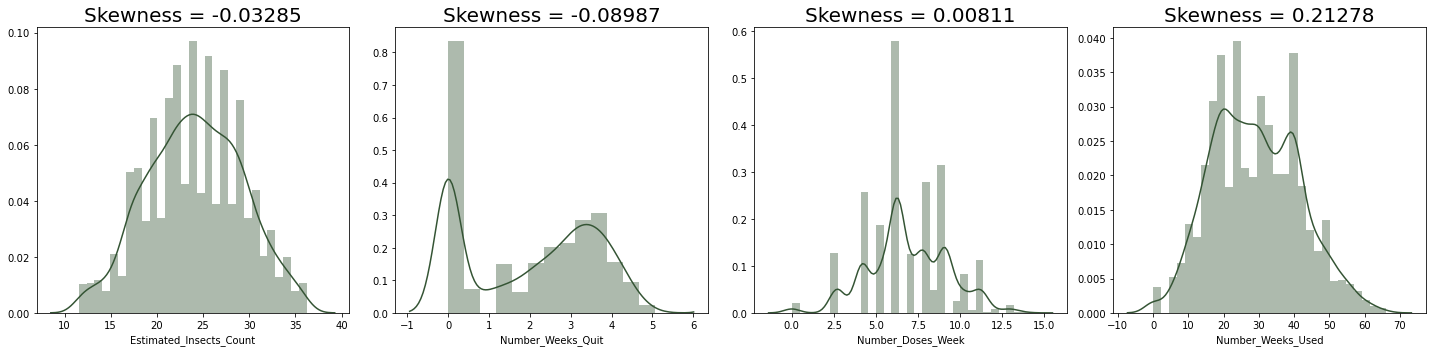

In [17]:
DF=df

from scipy.stats import yeojohnson

skew = [ "Estimated_Insects_Count","Number_Weeks_Quit","Number_Doses_Week"] 

for i in skew:
    DF[i]= yeojohnson(DF[i])[0]
    
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(20,5))
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF[collist[i]], color = agro4)
    plt.tight_layout()     

### Lets Identify the outliers and remove them.


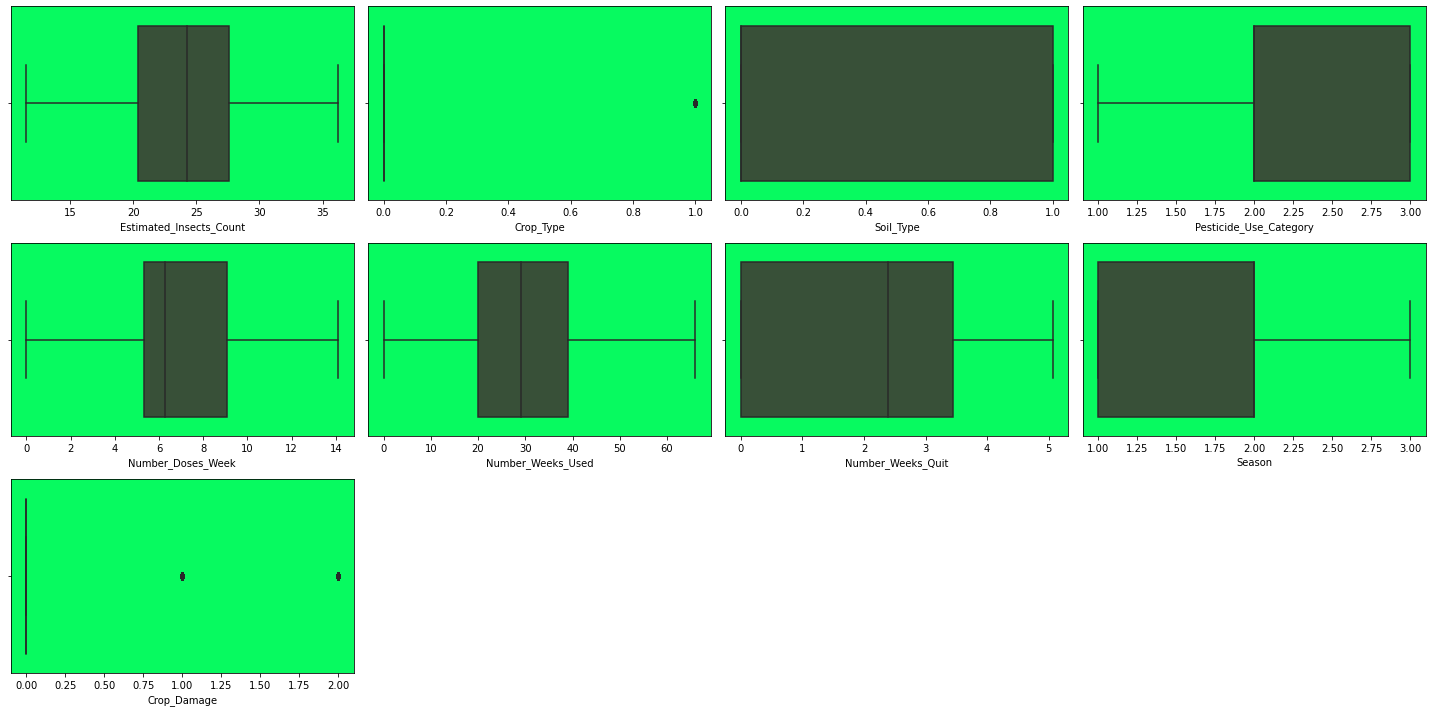

In [18]:
plt.figure(figsize=(20,10))
collist = DF.columns.values
for i in range (0, len(collist)):
    plt.subplot(3,4,i+1)
    ax=sns.boxplot(DF[collist[i]], color = agro4 , orient = "h")
    ax.set_facecolor(agro1)
    plt.tight_layout()

### The above observation Identifies there are outliers present in the dataset lets figure out how to remove them

Z-Score method

In [19]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [20]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((4599-4483)/4599)*100}%")

Orginal Data (4599, 9)
After Removing outliers (4483, 9)
The percentage of data loss 2.522287453794303%


the Loss of data is very minimal we will eliminate outliers and take the remaining data for analysis

In [21]:
df= df_new

### Multivariate analysis

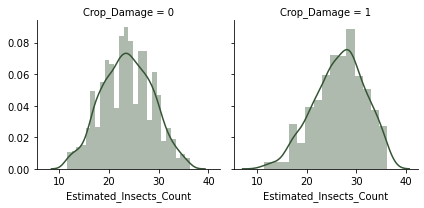

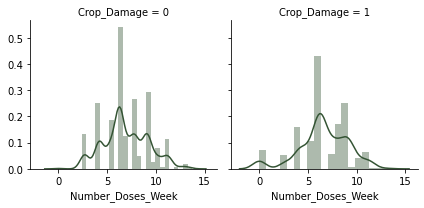

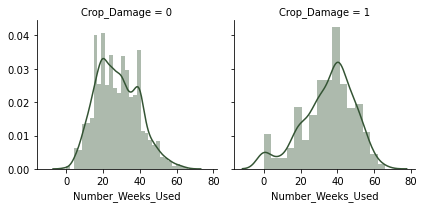

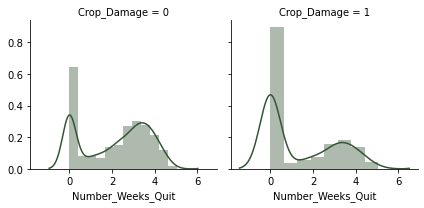

In [22]:
feature_var = ['Estimated_Insects_Count','Number_Doses_Week', 'Number_Weeks_Used',
                    'Number_Weeks_Quit']

for i in feature_var:
    facet= sns.FacetGrid(df,col="Crop_Damage")
    facet.map(sns.distplot,i,color = agro4)
    plt.show()

### Above we can see the distribution of the Continous Feature variable with Target variable. 
     when Crop_Damage = 0 and when Crop_Damage = 1
        We also can see the number of weak used and Estimated insect count since because of the high corelation 
     the distribution is evenly and largly spread

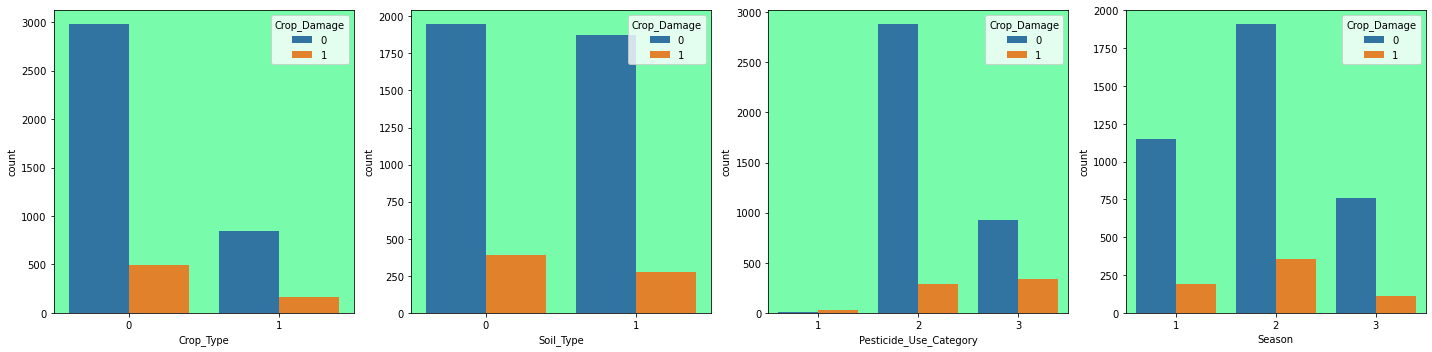

In [23]:
feature = ['Crop_Type', 'Soil_Type','Pesticide_Use_Category','Season']
plt.figure(figsize=(20,5))
for i in range (0, len(feature)):
    plt.subplot(1,4,i+1)
    ax=sns.countplot(df[feature[i]],hue = df.Crop_Damage)
    ax.set_facecolor(agro2)
    plt.tight_layout()

### Above we can see the distribution of the Categorical Feature variable with Target variable.

 when Crop_Damage = 0 and when Crop_Damage = 1
    We also can see all the data majorly in Crop_Damage = 0 i.e crop is healthier.

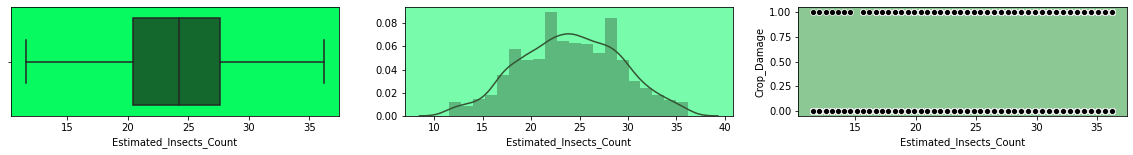

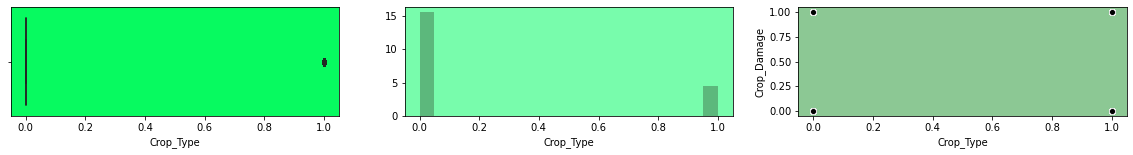

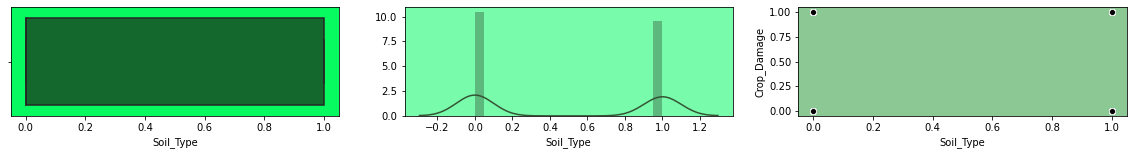

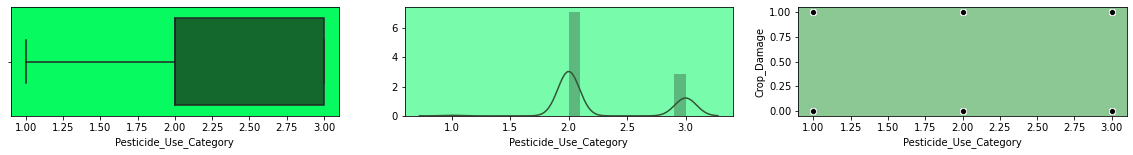

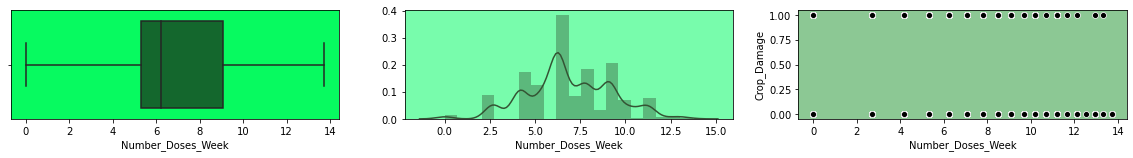

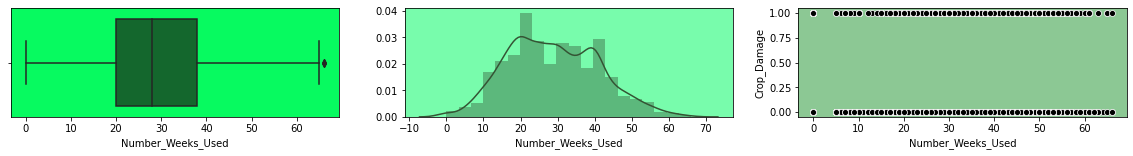

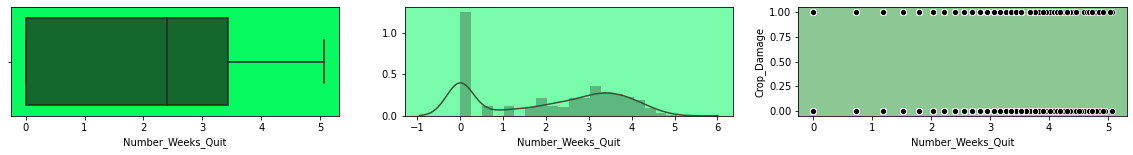

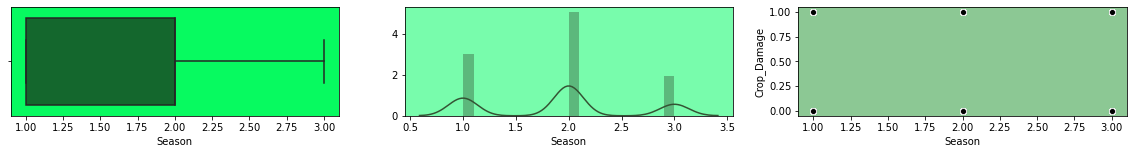

In [24]:
target_variable = 'Crop_Damage'
feature_variable = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
                    'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
                    'Number_Weeks_Quit', 'Season']


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=agro5)
    a1.set_facecolor(agro1)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=agro4)
    a2.set_facecolor(agro2)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2], color="k")
    a3.set_facecolor(agro3)
    plt.show()
    
for i in feature_variable:
    num_plots(i) 

### In the above observation we can see the dispersion of all feature variable with target variable.

### Scaling all the continuous variable before shortlisting model.

In [25]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
df[['Estimated_Insects_Count',
         'Number_Doses_Week', 
         'Number_Weeks_Used',
         'Number_Weeks_Quit']] = sc.fit_transform(df[['Estimated_Insects_Count',
                                                            'Number_Doses_Week',
                                                            'Number_Weeks_Used',
                                                            'Number_Weeks_Quit']])
    

>We have scaled our data for training our model lets split our data into feature variables and target variables

In [26]:
x=df.drop(["Crop_Damage"], axis = 1)
y=df.Crop_Damage

### Selecting parameters for training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")



Best Accuracy 87.15432649420161 found on randomstate 180


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

### Selecting the Best model for Training 

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [30]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes



In [31]:
models = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "K Neighbors Classifier", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [32]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])





Step 1 of 9
....................................................................running LogisticRegression
Accuracy: 0.8370020519351872 - (std: 0.006751332144092677)
Precision: 0.7717712097558836 - (std: 0.02170086319122146)
Recall: 0.8370020519351872 - (std: 0.006751332144092677)
f1: 0.7826188687044546 - (std: 0.008681712477386718)


Step 2 of 9
....................................................................running Naive Bayes Gaussian
Accuracy: 0.8170686513832873 - (std: 0.02420046887366789)
Precision: 0.8066936795142429 - (std: 0.022346701418794305)
Recall: 0.8170686513832873 - (std: 0.02420046887366789)
f1: 0.8112507706940265 - (std: 0.02283712562715613)


Step 3 of 9
....................................................................running K Neighbors Classifier
Accuracy: 0.8268967133658812 - (std: 0.016593008799570323)
Precision: 0.7959129171305834 - (std: 0.019701778496747202)
Recall: 0.8268967133658812 - (std: 0.016593008799570323)
f1: 0.8060753208343042 - (std: 0.0165

In [33]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)



Model  accuracy  precision    recall        f1
8                 XGBoost  0.832542   0.804712  0.832542  0.813745
3           Random Forest  0.837596   0.804727  0.837596  0.812121
1    Naive Bayes Gaussian  0.817069   0.806694  0.817069  0.811251
7       Gradient Boosting  0.847417   0.812580  0.847417  0.811047
6               Ada Boost  0.843250   0.803463  0.843250  0.806660
2  K Neighbors Classifier  0.826897   0.795913  0.826897  0.806075
0      LogisticRegression  0.837002   0.771771  0.837002  0.782619
5              Extra Tree  0.775139   0.776235  0.775139  0.775641
4           Decision Tree  0.768292   0.783410  0.768292  0.775153

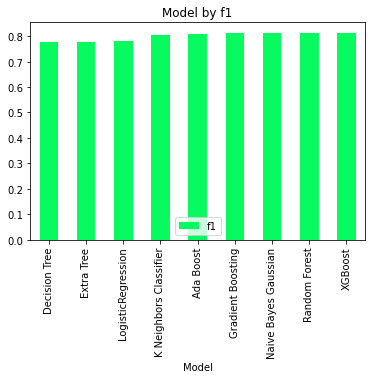

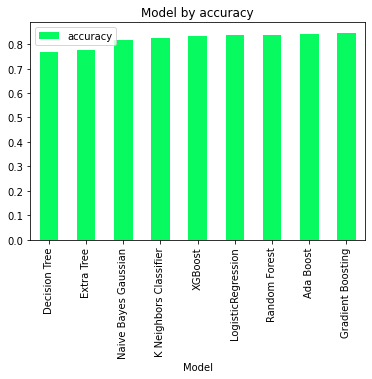

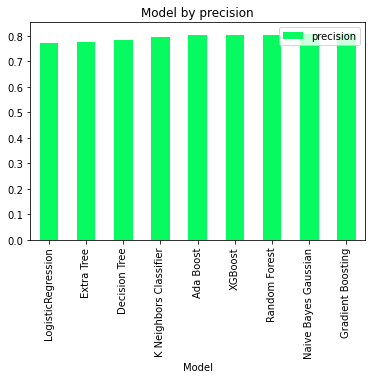

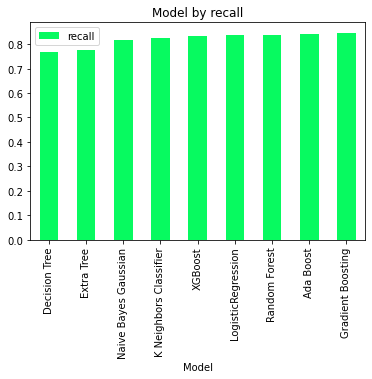

In [34]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = agro1)
    plt.title(f"Model by {metric}")
    plt.show()

### Since XGB tops the chart with the following metrics we will Hyper tune Xgb to get better results.
     
        XGBOOST
    1. accuracy  = 0.832542 
    2. precision = 0.804712
    3. recall    = 0.832542         
    4. f1        = 0.813475



In [35]:
clf_xgb =  xgb.XGBClassifier()
preds = cross_val_predict(clf_xgb, x_train, y_train, cv=5, n_jobs=-1)

In [36]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [37]:
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted     0    1
Real                
0          2664  173
1           390  135

In [38]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2837
           1       0.44      0.26      0.32       525

    accuracy                           0.83      3362
   macro avg       0.66      0.60      0.61      3362
weighted avg       0.80      0.83      0.81      3362



### Hyper Tuning...... 

In [39]:
param_grid = [
    {'learning_rate' : [1e-3, 1e-1, 'log-uniform'],
     'n_estimators': [100, 2000],
     'max_depth': [1, 10],
     'min_child_weight': [1, 6.],
     'gamma': [0, 0.5], 
     'subsample':[0.5, 1.], 
     'colsample_bytree': [0.5, 1.] 
    }
]


clf_xgb =  xgb.XGBClassifier()
clf_random = RandomizedSearchCV(clf_xgb, param_grid, n_iter = 200, cv = 5, 
                                scoring="f1_weighted", verbose=2, 
                                random_state=42, n_jobs = -1)

In [40]:
clf_random.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 455 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 13.9min finished


[09:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [41]:
clf_random.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'min_child_weight': 6.0,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [42]:
clf_random.best_score_

0.8201500701576764

In [43]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2837
           1       0.55      0.21      0.30       525

    accuracy                           0.85      3362
   macro avg       0.71      0.59      0.61      3362
weighted avg       0.82      0.85      0.82      3362



### After hyper tuning with RandomizedSearch-CV Xgb results are has follows.
     XGBOOST

1. accuracy  = 0.85    
2. precision = 0.87
3. recall    = 0.97             
4. f1        = 0.85

  Unequivocally there is a little improvemet but also we will continue tuning with GridSearch CV

 

In [44]:
grid_search = GridSearchCV(clf_xgb, param_grid, cv=5,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 459 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 13.8min finished


[09:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [45]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 6.0,
 'n_estimators': 100,
 'subsample': 0.5}

In [46]:
grid_search.best_score_

0.8201500701576764

In [47]:
final_model = grid_search.best_estimator_
preds = cross_val_predict(final_model, x_train, y_train, cv=5, n_jobs=-1)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])

Predicted     0    1
Actual              
0          2747   90
1           415  110

In [49]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2837
           1       0.55      0.21      0.30       525

    accuracy                           0.85      3362
   macro avg       0.71      0.59      0.61      3362
weighted avg       0.82      0.85      0.82      3362



In [50]:
y_pred = final_model.predict(x_test)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted    0   1
Actual            
0          945  37
1          116  23

In [51]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       982
           1       0.38      0.17      0.23       139

    accuracy                           0.86      1121
   macro avg       0.64      0.56      0.58      1121
weighted avg       0.83      0.86      0.84      1121



In [52]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

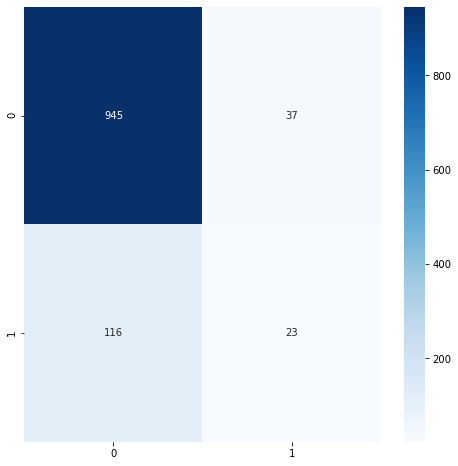

In [53]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=final_model.classes_,
                 yticklabels=final_model.classes_,
                cmap= "Blues")

### After hyper tuning with RandomizedSearch-CV Xgb results are has follows.

       XGBOOST

    1. accuracy = 0.86

    2. precision = 0.89

    3. recall = 0.96

    4. f1 = 0.86

### Sumary:

### Crop Quality

>The above analysis of data helps us to under the accurate detection and classification of crop quality characteristics can increase product price and reduce waste. In comparison with the human experts, machines can make use of seemingly meaningless data and interconnections to reveal new qualities playing role in the overall quality of the crops and to detect them. 
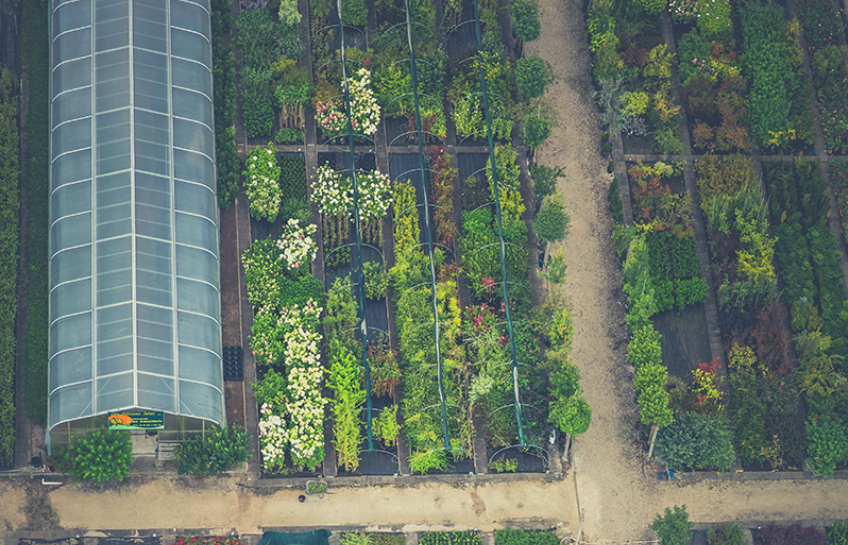

#### EDA PIPELINE

>Cleansing our data started from removing the grabage data from our data set. We identified the null values in our data and filled the null values.


                                          Estimated_Insects_Count      0
                                          Crop_Type                    0
                                          Soil_Type                    0
                                          Pesticide_Use_Category       0
                                          Number_Doses_Week            0
                                          Number_Weeks_Used          442
                                          Number_Weeks_Quit            0
                                          Season                       0
                                          Crop_Damage                  0
                                          
>We filled the null values on seeing the correlation of the missing data and splited the data into 47 pieces and filled the null values with the mode of the missing data. On analysing the correlation of the data with the target variable we figured the data which has high correlation and also the data which has low correlation. On identifing the skewness and outliers eleminated with 'yeo-johnson' method and scaled the data with Standared-Scaler.

### Shortlisting the best model:
>We created a loop of 0 - 500 and shortlisted randomstate on 180 on seeing best accuracy of LogisticRegression() model
further we shortlisted XGBoost model from 9 different classification algorithms and we hypertuned with GridsearchCV to increase performance. 

We are now saving the model for further use...

### Saving the final model


In [54]:
import joblib
joblib.dump(final_model,"Agri.obj")

['Agri.obj']

### Now lets load our testing data and clense it in the same method before prediction

In [55]:
x = df = pd.read_excel("test_agriculture.xlsx")

Cleansing the testing data as the simalar way we did previously

In [56]:
x.drop('ID', axis=1, inplace = True)
list= []
for i in x.Number_Weeks_Quit.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'NWQ_{i} = x.loc[x.Number_Weeks_Quit=={list[i]}]')
    exec(f"NWQ_{i}.Number_Weeks_Used.fillna(NWQ_{i}['Number_Weeks_Used'].mode()[0], inplace = True)")

X = pd.concat([NWQ_0,NWQ_1,NWQ_2,NWQ_3,NWQ_4,NWQ_5,NWQ_6,NWQ_7,NWQ_8,NWQ_9,NWQ_10,NWQ_11,NWQ_12,NWQ_13,NWQ_14,
                NWQ_15,NWQ_16,NWQ_17,NWQ_18,NWQ_19,NWQ_20,NWQ_21,NWQ_22,NWQ_23,NWQ_24,NWQ_25,NWQ_26,NWQ_27,
                NWQ_28,NWQ_29,NWQ_30,NWQ_31,NWQ_32,NWQ_33,NWQ_34,NWQ_35,NWQ_36,NWQ_37,NWQ_38,NWQ_39,NWQ_40,
                NWQ_41])
x= X.sort_index()

from scipy.stats import yeojohnson

skew_t = [ "Estimated_Insects_Count","Number_Weeks_Quit","Number_Doses_Week"] 

for i in skew_t:        
    x[i]= yeojohnson(x[i])[0]

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x[['Estimated_Insects_Count','Number_Doses_Week',
        'Number_Weeks_Used','Number_Weeks_Quit']] = sc.fit_transform(x[['Estimated_Insects_Count',
                                                                             'Number_Doses_Week',
                                                                             'Number_Weeks_Used',
                                                                             'Number_Weeks_Quit']])

In [57]:
Agri_model= joblib.load('Agri.obj')
prediction = Agri_model.predict(x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
Predicted_Crop_Damage=pd.DataFrame({"Predicted_Crop_Damage":prediction})

In [59]:
Predicted_Crop_Damage

Predicted_Crop_Damage
0                         0
1                         0
2                         0
3                         0
4                         0
...                     ...
1194                      0
1195                      0
1196                      0
1197                      0
1198                      0

[1199 rows x 1 columns]

In [62]:
Predicted_Crop_Damage.to_csv("Predicted_Crop_Damage.csv") # Saving our prediction in CSV format.   

### Conclution:

>Agriculture is the major economic force in the country. 
>>The above study helps to understand what are the factors that affects the quality of the Crops, how to use the pesticide to get a good quality of crops. Which season will give better yeild.
